In [1]:
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1005. Miscellaneous Analyses/P1005.2. Allostatic Load CS Exposure/P1005.2.3. Analyses/P1005.2.3.1. Allostatic Load Calculation/Output')
cur_date = "082922"

library(readxl)
library(tidyverse)
library(reshape2)


# reading in file
allostatic_loading_df = data.frame(read_excel("Input/Allostatic_Mediator_Data_061722ap.xlsx", sheet = 2))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
# viewing the dataset initially helps ensure it was read it properly and gives a view of what it looks like
head(allostatic_loading_df)

,Study,Original_Subject_Number,Subject_Number,Group,Subject_ID,Sex,Age,Race,Category,Variable,Value
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,FM2,97,1,CS,CS_1,M,18,B,AL Biomarker,Cortisol,140.304
2,FM2,99,2,CS,CS_2,F,20,W,AL Biomarker,Cortisol,246.542
3,FM2,101,3,CS,CS_3,F,20,W,AL Biomarker,Cortisol,50.878
4,FM2,98,4,CS,CS_4,F,21,W,AL Biomarker,Cortisol,137.387
5,TCORS LAIV,39,5,CS,CS_5,M,21,W,AL Biomarker,Cortisol,116.602
6,FM2,100,6,CS,CS_6,F,22,W,AL Biomarker,Cortisol,54.030


Goal is to generate allostatic loading scores which is an index of atherosclerotic risk protection from these biomarkers and to compare based on tobacco smoke exposure and race as a potential covariate. 

**Prior to analysis always describe what the aim of the analysis is, so you're clear and those reviewing your code are also clear. 

In [3]:
# creating all dfs to be analyzed
nonsmoker_df = allostatic_loading_df %>%
    # using a pipe (%>%) to filter the group column in the df for non-smokers only
    filter(Group == "NS")
smoker_df = allostatic_loading_df %>%
    filter(Group == "CS")

# splitting the df based on group and race, so to make the code more efficient
split_allostatic_df = allostatic_loading_df %>%
    # grouping by group then race
    group_by(Group, Race) %>%
    # splitting the df based on those variables
    group_split()

black_nonsmoker_df = split_allostatic_df[[3]]
black_smoker_df = split_allostatic_df[[1]]
white_nonsmoker_df = split_allostatic_df[[4]]
white_smoker_df = split_allostatic_df[[2]]

# viewing one of the dataframes 
head(black_nonsmoker_df)

Study,Original_Subject_Number,Subject_Number,Group,Subject_ID,Sex,Age,Race,Category,Variable,Value
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
Woodsie,1,37,NS,NS_37,F,21,B,AL Biomarker,Cortisol,106.118
Woodsie,20,39,NS,NS_39,F,21,B,AL Biomarker,Cortisol,81.722
FM2,92,42,NS,NS_42,M,24,B,AL Biomarker,Cortisol,86.759
FM2,88,47,NS,NS_47,F,26,B,AL Biomarker,Cortisol,92.002
Woodsie,22,50,NS,NS_50,F,27,B,AL Biomarker,Cortisol,150.650
Woodsie,38,53,NS,NS_53,F,28,B,AL Biomarker,Cortisol,137.048


In [4]:
mediator_score = function(df){
    # always use these next lines to describe the inputs, outputs, and purpose of your function
    
    # """
    # Creating a scoring function for each mediator.
    # :param (input): initial df (df)
    # :output: df containing the variable (biomarker) name, subject ID, and score
    # """
    
    # creating an empty df to store values
    score_df = data.frame()
    
    # getting all variable names for loop to iterate through
    mediators = unique(df$Variable)
    
    # your iterator (in this case 'i') can be any letter or word, but typically in computer science i or j are used
    for (i in 1:length(mediators)){

        # filtering df for each mediator
        filtered_df = df %>%
            filter(Variable == mediators[i])
        
        # now iterating through each value of the filtered_df, since we want to access each value
        for (j in 1:length(filtered_df$Value)){

            # score = (mediator value - mediator min)/ (mediator max - mediator min)
            mediator_score_formula = (filtered_df$Value[j] - min(filtered_df$Value))/(max(filtered_df$Value) - min(filtered_df$Value))

            # storing mediator, subject id, and score
            values_vector = cbind(mediators[i], df$Subject_ID[j], mediator_score_formula)
            score_df = rbind(score_df, values_vector)
        }
    }
    
    # renaming columns
    colnames(score_df) = c("Variable", "Subject_ID", "Mediator_Score")
    
    # for some reason the Mediator_Score is a character type, so changing to a numeric
    score_df$Mediator_Score = as.numeric(score_df$Mediator_Score)
    
    return(score_df)
}

In [5]:
# calling mediator_score function
NS_mediator_score_df = mediator_score(nonsmoker_df)
CS_mediator_score_df = mediator_score(smoker_df)
black_NS_mediator_score_df = mediator_score(black_nonsmoker_df)
black_CS_mediator_score_df = mediator_score(black_smoker_df)
white_NS_mediator_score_df = mediator_score(white_nonsmoker_df)
white_CS_mediator_score_df = mediator_score(white_smoker_df)

# viewing results of one of the dataframes
head(NS_mediator_score_df)

,Variable,Subject_ID,Mediator_Score
,<chr>,<chr>,<dbl>
1,Cortisol,NS_34,0.02198360
2,Cortisol,NS_35,0.03002492
3,Cortisol,NS_36,0.22051964
4,Cortisol,NS_37,0.35061670
5,Cortisol,NS_38,0.99352907
6,Cortisol,NS_39,0.26660135


In [6]:
allostatic_score = function(mediator_score_df, Group, Covariate){
    # """
    # Creating a scoring function for allostatic load.
    # :param (input): mediator score df (mediator_score_df), smoking group of subjects, race of subjects
    # :output: df containing the group, covariate (race) either black or white, and allostatic score
    # """
    
    # creating a vector for variables that increase atherosclerotic risk
    allostatic_load_biomarkers = c('Cortisol','Noradrenaline','Hba1c','Fibrinogen','CRP')
    
    # filtering df for these allostatic load biomarkers
    load_df = mediator_score_df %>%
        filter(Variable %in% allostatic_load_biomarkers) 
    
    # filtering for HDL
    HDL_df = mediator_score_df %>%
        filter(Variable == "HDL") %>%
        select(-Variable)
    
    # summing the mediator scores for biomarkers that increase atherosclerotic risk
    biomarker_load_df = load_df %>%
        group_by(Subject_ID) %>%
        summarize(Mediator_Score_Sum = sum(Mediator_Score))
    
    # allostatic score = sum of scores of all load biomarkers for a subject - individual subject HDL score
    # storing this value in the df as another col
    allostatic_load_df = data.frame(Subject_ID = biomarker_load_df$Subject_ID, 
                                    Allostatic_Load = biomarker_load_df$Mediator_Score_Sum - HDL_df$Mediator_Score)
    
    # putting these values into a vector and adding to the df
    score_df = cbind(Group, Covariate, allostatic_load_df)
    
    return(score_df)
}

In [7]:
# calling allostatic_score function
# these first two lines of code have "NA" values for race, since we weren't looking at race as a covariate until 
# the dfs were stratified later by race
NS_allostatic_score_df = allostatic_score(NS_mediator_score_df, "NS", "NA")
CS_allostatic_score_df = allostatic_score(CS_mediator_score_df, "CS", "NA")
black_NS_allostatic_score_df = allostatic_score(black_NS_mediator_score_df, "NS", "B")
black_CS_allostatic_score_df = allostatic_score(black_CS_mediator_score_df, "CS", "B")
white_NS_allostatic_score_df = allostatic_score(white_NS_mediator_score_df, "NS", "W")
white_CS_allostatic_score_df = allostatic_score(white_CS_mediator_score_df, "CS", "W")

# viewing one of the outputs
head(NS_allostatic_score_df)

,Group,Covariate,Subject_ID,Allostatic_Load
,<chr>,<chr>,<chr>,<dbl>
1,NS,NA,NS_34,-0.1958642
2,NS,NA,NS_35,0.9714598
3,NS,NA,NS_36,-0.1828915
4,NS,NA,NS_37,1.5662818
5,NS,NA,NS_38,2.5698663
6,NS,NA,NS_39,1.5566195


In [8]:
# creating 1 df for the allostatic scores
# using the rbind function to combine by rows
allostatic_score_df = rbind(NS_allostatic_score_df, CS_allostatic_score_df, black_NS_allostatic_score_df, 
                            black_CS_allostatic_score_df, white_NS_allostatic_score_df, 
                            white_CS_allostatic_score_df) %>%
    # sorting the df from highest to lowest for easier viewing
    arrange(-Allostatic_Load)

head(allostatic_score_df)

,Group,Covariate,Subject_ID,Allostatic_Load
,<chr>,<chr>,<chr>,<dbl>
1,NS,B,NS_50,3.414885
2,NS,W,NS_41,3.308548
3,NS,W,NS_38,3.164820
4,NS,W,NS_49,2.843204
5,CS,NA,CS_32,2.815147
6,NS,B,NS_62,2.810847


In [9]:
# exporting t test results for volcano plot
write.csv(allostatic_score_df, paste0(Output,"/", cur_date, "_Allostatic_Load_Scores.csv"), row.names = FALSE)

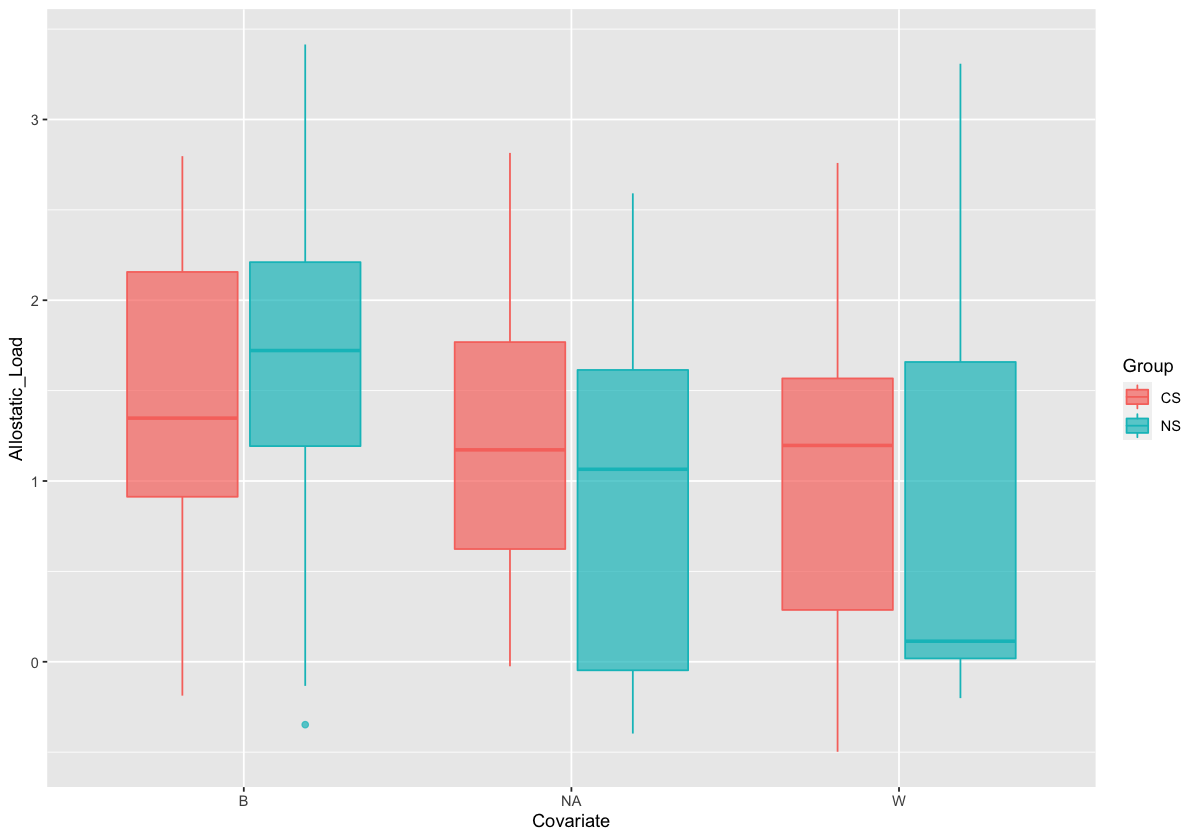

In [10]:
# just because I'm interested I wanted to see how these groups were distributed so I made this visualization
options(repr.plot.width=10, repr.plot.height=7) #changing size
ggplot(data = allostatic_score_df, aes(x = Covariate, y = Allostatic_Load, color = Group)) +
  #stat_boxplot(geom = "errorbar", width = 0.2) + # changes width of whiskers
  geom_boxplot(aes(fill = Group), alpha = 0.7) #+ 
  #geom_point(position = position_jitter(w = 0.1)) #+ 
  #facet_wrap(~Group)